<a href="https://colab.research.google.com/github/sujitojha1/EVA8/blob/main/Session6/EVA8_S6_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading Module and Models

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
# Future print function
from __future__ import print_function

# Load modules/models from EVA course
!git clone https://github.com/sujitojha1/EVA8 -q --quiet
!mv EVA8/Session6/*.py .
!rm -rf EVA8
print("Loaded Modules and Models")

# Installing latest Albumentation library
!pip install -U git+https://github.com/albu/albumentations -q --quiet

# For inline matplotlib plotting
%matplotlib inline

Loaded Modules and Models
  Preparing metadata (setup.py) ... done


## Target : Train a network

1. change the code such that it uses GPU and  
2. change the architecture to C1C2C3C40 (No MaxPooling, but 3 3x3 layers with stride of 2 instead) (If you can figure out how to use Dilated kernels here instead of MP or strided convolution)  
3. total RF must be more than 44  
4. one of the layers must use Depthwise Separable Convolution  
5. one of the layers must use Dilated Convolution
6. use GAP (compulsory)
7. add FC after GAP to target #of classes (optional)  
8. use albumentation library and apply:  
    a. horizontal flip  
    b. shiftScaleRotate  
    c. coarseDropout (max_holes = 1, max_height=16px, max_width=1, min_holes = 1, min_height=16px, min_width=16px, fill_value=(mean of your dataset), mask_fill_value = None)  
9. achieve 85% accuracy, as many epochs as you want. Total Params to be less than 200k.  

## Loading train and test data with transforms and loader functions



In [ ]:
from data_loader import *

# Loading test and train data & dataloader
cifar10 = dataset_cifar10(batch_size=128)

# Train dataloader
trainloader = cifar10.loader(train_flag=True)

# Test dataloader
testloader = cifar10.loader(train_flag=False)

classes = cifar10.classes

CUDA availability ? True


  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./Data/cifar-10-python.tar.gz to ./Data
Files already downloaded and verified


## Exploratory Data Analysis


### Summary Statistics

In [ ]:
cifar10.data_summary_stats()

Files already downloaded and verified
Files already downloaded and verified
(60000, 32, 32, 3)
[0.49186878 0.48265391 0.44717728]
[0.24697121 0.24338894 0.26159259]


### Plotting sample images

Files already downloaded and verified


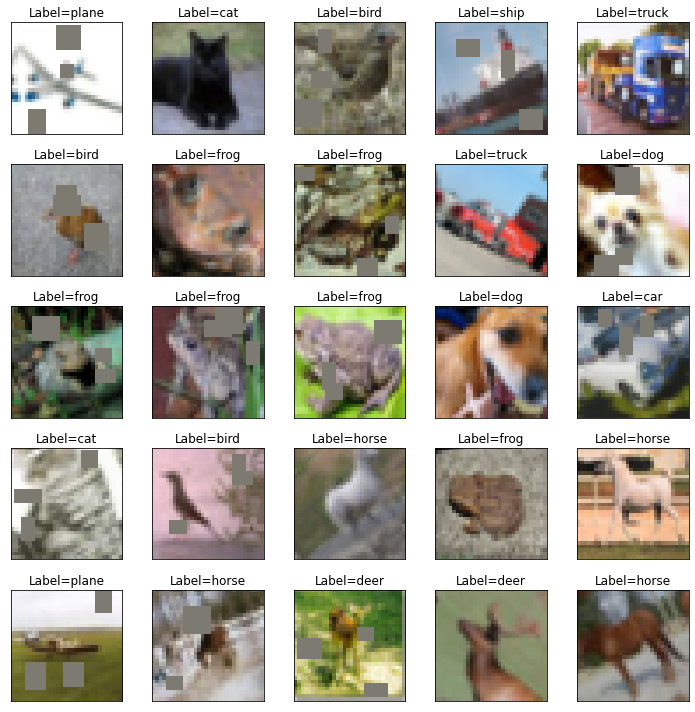

In [ ]:
cifar10.sample_pictures(train_flag=True)

## The Model

In [ ]:
from model import *

# Loading Custom Model
net = Net()

# Using cuda if available
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

# Sending network to device
net = net.to(device)

cuda


## Model Summary



In [ ]:
!pip install torchsummary
from torchsummary import summary

# Model Summary
summary(net, input_size=(3, 32, 32))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             864
              ReLU-2           [-1, 32, 32, 32]               0
       BatchNorm2d-3           [-1, 32, 32, 32]              64
            Conv2d-4          [-1, 192, 32, 32]           6,144
              ReLU-5          [-1, 192, 32, 32]               0
       BatchNorm2d-6          [-1, 192, 32, 32]             384
            Conv2d-7          [-1, 192, 32, 32]           1,728
              ReLU-8          [-1, 192, 32, 32]               0
       BatchNorm2d-9          [-1, 192, 32, 32]             384
           Conv2d-10           [-1, 32, 32, 32]           6,144
             ReLU-11           [-1, 32, 32, 32]               0
      BatchNorm2d-12           [-1, 32, 32, 32]              64
    

## Define a Loss function and optimizer

In [ ]:
import torch.optim as optim
import torch.nn as nn
from torch.optim.lr_scheduler import StepLR

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=0.9)
scheduler = StepLR(optimizer, step_size=6, gamma=0.1)

## Training and Testing

In [ ]:
# Load train and test model
from main import *

train = train()
test = test()

EPOCHS= 25

for epoch in range(EPOCHS):  # loop over the dataset multiple times

    train.execute(net, device, trainloader, optimizer, criterion, epoch)
    scheduler.step()
    test.execute(net, device, testloader, criterion)

print('Finished Training')

Epoch: 0,Loss=1.34 Batch_id=390 Accuracy=44.28: 100%|██████████| 391/391 [00:21<00:00, 18.03it/s]


Test set: Average loss: 0.0089, Accuracy: 5980/10000 (59.80%)



Epoch: 1,Loss=1.10 Batch_id=390 Accuracy=57.06: 100%|██████████| 391/391 [00:18<00:00, 21.00it/s]


Test set: Average loss: 0.0078, Accuracy: 6554/10000 (65.54%)



Epoch: 2,Loss=0.85 Batch_id=390 Accuracy=62.89: 100%|██████████| 391/391 [00:18<00:00, 20.99it/s]


Test set: Average loss: 0.0066, Accuracy: 7049/10000 (70.49%)



Epoch: 3,Loss=0.83 Batch_id=390 Accuracy=66.91: 100%|██████████| 391/391 [00:18<00:00, 20.87it/s]


Test set: Average loss: 0.0058, Accuracy: 7494/10000 (74.94%)



Epoch: 4,Loss=0.86 Batch_id=390 Accuracy=69.27: 100%|██████████| 391/391 [00:18<00:00, 21.08it/s]


Test set: Average loss: 0.0058, Accuracy: 7467/10000 (74.67%)



Epoch: 5,Loss=1.03 Batch_id=390 Accuracy=71.35: 100%|██████████| 391/391 [00:18<00:00, 20.94it/s]


Test set: Average loss: 0.0050, Accuracy: 7811/10000 (78.11%)



Epoch: 6,Loss=0.72 Batch_id=390 Accuracy=75.06: 100%|██████████| 391/391 [00:18<00:00, 21.10it/s]


Test set: Average loss: 0.0044, Accuracy: 8073/10000 (80.73%)



Epoch: 7,Loss=0.68 Batch_id=390 Accuracy=76.41: 100%|██████████| 391/391 [00:18<00:00, 21.00it/s]


Test set: Average loss: 0.0042, Accuracy: 8154/10000 (81.54%)



Epoch: 8,Loss=0.68 Batch_id=390 Accuracy=76.65: 100%|██████████| 391/391 [00:18<00:00, 21.20it/s]


Test set: Average loss: 0.0041, Accuracy: 8170/10000 (81.70%)



Epoch: 9,Loss=0.64 Batch_id=390 Accuracy=77.05: 100%|██████████| 391/391 [00:19<00:00, 20.39it/s]


Test set: Average loss: 0.0041, Accuracy: 8198/10000 (81.98%)



Epoch: 10,Loss=0.75 Batch_id=390 Accuracy=77.54: 100%|██████████| 391/391 [00:18<00:00, 21.12it/s]


Test set: Average loss: 0.0041, Accuracy: 8203/10000 (82.03%)



Epoch: 11,Loss=0.60 Batch_id=390 Accuracy=77.77: 100%|██████████| 391/391 [00:18<00:00, 20.87it/s]


Test set: Average loss: 0.0040, Accuracy: 8256/10000 (82.56%)



Epoch: 12,Loss=0.58 Batch_id=390 Accuracy=78.00: 100%|██████████| 391/391 [00:18<00:00, 21.13it/s]


Test set: Average loss: 0.0040, Accuracy: 8259/10000 (82.59%)



Epoch: 13,Loss=0.55 Batch_id=390 Accuracy=78.41: 100%|██████████| 391/391 [00:18<00:00, 21.11it/s]


Test set: Average loss: 0.0040, Accuracy: 8263/10000 (82.63%)



Epoch: 14,Loss=0.57 Batch_id=390 Accuracy=78.52: 100%|██████████| 391/391 [00:18<00:00, 20.88it/s]


Test set: Average loss: 0.0040, Accuracy: 8263/10000 (82.63%)



Epoch: 15,Loss=0.59 Batch_id=390 Accuracy=78.40: 100%|██████████| 391/391 [00:18<00:00, 20.91it/s]


Test set: Average loss: 0.0039, Accuracy: 8277/10000 (82.77%)



Epoch: 16,Loss=0.62 Batch_id=390 Accuracy=78.45: 100%|██████████| 391/391 [00:18<00:00, 21.00it/s]


Test set: Average loss: 0.0039, Accuracy: 8282/10000 (82.82%)



Epoch: 17,Loss=0.54 Batch_id=390 Accuracy=78.75: 100%|██████████| 391/391 [00:18<00:00, 21.14it/s]


Test set: Average loss: 0.0039, Accuracy: 8302/10000 (83.02%)



Epoch: 18,Loss=0.61 Batch_id=390 Accuracy=78.60: 100%|██████████| 391/391 [00:18<00:00, 21.04it/s]


Test set: Average loss: 0.0039, Accuracy: 8295/10000 (82.95%)



Epoch: 19,Loss=0.69 Batch_id=390 Accuracy=78.57: 100%|██████████| 391/391 [00:18<00:00, 20.82it/s]


Test set: Average loss: 0.0039, Accuracy: 8294/10000 (82.94%)



Epoch: 20,Loss=0.55 Batch_id=390 Accuracy=78.35: 100%|██████████| 391/391 [00:19<00:00, 19.67it/s]


Test set: Average loss: 0.0039, Accuracy: 8314/10000 (83.14%)



Epoch: 21,Loss=0.68 Batch_id=390 Accuracy=78.64: 100%|██████████| 391/391 [00:18<00:00, 20.94it/s]


Test set: Average loss: 0.0039, Accuracy: 8289/10000 (82.89%)



Epoch: 22,Loss=0.54 Batch_id=390 Accuracy=78.50: 100%|██████████| 391/391 [00:18<00:00, 21.04it/s]


Test set: Average loss: 0.0040, Accuracy: 8307/10000 (83.07%)



Epoch: 23,Loss=0.78 Batch_id=390 Accuracy=78.39: 100%|██████████| 391/391 [00:18<00:00, 21.00it/s]


Test set: Average loss: 0.0039, Accuracy: 8294/10000 (82.94%)



Epoch: 24,Loss=0.56 Batch_id=390 Accuracy=78.59: 100%|██████████| 391/391 [00:18<00:00, 20.98it/s]


Test set: Average loss: 0.0039, Accuracy: 8316/10000 (83.16%)

Finished Training


## Display an image from the test set

Files already downloaded and verified


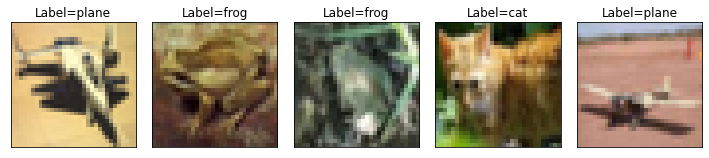

In [ ]:
images, labels = cifar10.sample_pictures(train_flag=False, return_flag = True)

## Prediction of sampe test set

In [ ]:
images,labels = images.to(device),labels.to(device)
outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(5)))

Predicted:  plane  frog  frog   cat plane


## Evaluating Train Accuracy

In [ ]:
from evaluate import *
calAccuracy(net, trainloader, device)

Accuracy of the network on the  train images: 79.992 %%


## Evaluating Test Accuracy

In [ ]:
calAccuracy(net, testloader, device)

Accuracy of the network on the  train images: 83.16 %%


## Evaluating test Accuracy over different classes

In [ ]:
calClassAccuracy(net, testloader,classes, device)

Accuracy of plane : 86 %
Accuracy of   car : 91 %
Accuracy of  bird : 80 %
Accuracy of   cat : 47 %
Accuracy of  deer : 96 %
Accuracy of   dog : 86 %
Accuracy of  frog : 90 %
Accuracy of horse : 86 %
Accuracy of  ship : 89 %
Accuracy of truck : 80 %
